In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [93]:
df = pd.io.stata.read_stata('ZA7572_v1-0-0-91.3 .dta')
len(df)

27655

In [94]:
df.head()

,studyno1,studyno2,doi,version,edition,survey,caseid,uniqid,serialid,tnscntry,...,w87,w89,w90,w98,w83,w84,w99,w85,w86,wex
0,GESIS STUDY ID ZA7572,GESIS STUDY ID ZA7572,doi:10.4232/1.13372,1.0.0 (2019-09-30),Archive pre-release,Eurobarometer 91.3 (April 2019),17,10000017,1,belgique,...,0.683368,0.563050,0.0,0.593944,0.0,0.0,0.0,0.622649,0.0,9730.496094
1,GESIS STUDY ID ZA7572,GESIS STUDY ID ZA7572,doi:10.4232/1.13372,1.0.0 (2019-09-30),Archive pre-release,Eurobarometer 91.3 (April 2019),18,10000018,2,belgique,...,0.505133,0.416196,0.0,0.439032,0.0,0.0,0.0,0.460250,0.0,7192.597168
2,GESIS STUDY ID ZA7572,GESIS STUDY ID ZA7572,doi:10.4232/1.13372,1.0.0 (2019-09-30),Archive pre-release,Eurobarometer 91.3 (April 2019),19,10000019,3,belgique,...,0.523790,0.431568,0.0,0.455248,0.0,0.0,0.0,0.477250,0.0,7458.256836
3,GESIS STUDY ID ZA7572,GESIS STUDY ID ZA7572,doi:10.4232/1.13372,1.0.0 (2019-09-30),Archive pre-release,Eurobarometer 91.3 (April 2019),20,10000020,4,belgique,...,0.584988,0.481991,0.0,0.508438,0.0,0.0,0.0,0.533010,0.0,8329.658203
4,GESIS STUDY ID ZA7572,GESIS STUDY ID ZA7572,doi:10.4232/1.13372,1.0.0 (2019-09-30),Archive pre-release,Eurobarometer 91.3 (April 2019),21,10000021,5,belgique,...,0.505133,0.416196,0.0,0.439032,0.0,0.0,0.0,0.460250,0.0,7192.597168


In [95]:
df.groupby('qb2')['qb2'].count()

qb2
1. Not at all a serious problem      373
2                                    219
3                                    492
4                                    597
5                                   2274
6                                   2154
7                                   3980
8                                   5409
9                                   3571
10. An extremely serious problem    8229
dk                                   357
Name: qb2, dtype: int64

In [96]:
df =  df.replace({'Box 1 - left' : 1, 'Box 2': 2, 'Box 3': 3, 'Box 4': 4, 'Box 5': 5, 'Box 6' : 6, 'Box 7': 7, 'Box 8': 8, 'Box 9': 9, 'Box 10 - right': 10 , '1. Not at all a serious problem': 1,'10. An extremely serious problem':10 })
df = df.replace({'15 years' : 15, '98 years': 98,'2 years': 2, '87 years': 87,'No full-time education':99, 'Still studying':0})
df = df.replace({'Unemployed, temporarily not working':'non-active', 'Retired, unable to work':'non-active','Student':'non-active','Farmer':'self employed', 'Fisherman': 'self employed','Skilled manual worker': 'employed', 'Unskilled manual worker, etc.':'employed','Responsible for ordinary shopping, etc.': 'non-active', 'Employed professional (employed doctor, etc.)':'employed', 'Employed position, at desk': 'employed','Employed position, travelling': 'employed', 'Employed position, service job':'employed','Supervisor':'employed','Professional (lawyer, etc.)': 'self employed', 'Owner of a shop, craftsmen, etc.':'self employed', 'Business proprietors, etc.': 'self employed','General management, etc.': 'employed', 'Middle management, etc.':'employed'})
df = df.replace({'(Re-)Married: without children':'Partner', '(Re-)Married: children this marriage':'Partner and children','(Re-)Married: children prev marriage':'Partner and children','(Re-)Married: children this/prev marriage':'Partner and children', 'Single liv w partner: without children': 'Partner','Single liv w partner: childr this union': 'Partner and children', 'Single liv w partner: childr prev union':'Partner and children','Single liv w partner: childr this/prev union': 'Partner and children', 'Single: without children':'Single', 'Single: with children': 'Single with children','Divorced/Separated: without children': 'Single', 'Divorced/Separated: with children':'Single with children','Widow: without children':'Single','Widow: with children': 'Single with children'})


In [97]:

#convert political orientation int categorical 
df['d1'] = df['d1'].replace({1:'Left', 2:'Left',3:'Centre-left',4: 'Centre-letf', 5: 'Centre',6: 'Centre-letf', 7: 'Centre-right', 8: 'Centre-right', 9: 'Right', 10: 'Right', 'Refusal': 'Not positionable', 'dk': 'Not positionable'})
c = df.groupby('d1').count()
c

,studyno1,studyno2,doi,version,edition,survey,caseid,uniqid,serialid,tnscntry,...,w87,w89,w90,w98,w83,w84,w99,w85,w86,wex
d1,,,,,,,,,,,,,,,,,,,,,
Centre,7300,7300,7300,7300,7300,7300,7300,7300,7300,7300,...,7300,7300,7300,7300,7300,7300,7300,7300,7300,7300
Centre-letf,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054,...,7054,7054,7054,7054,7054,7054,7054,7054,7054,7054
Centre-right,4099,4099,4099,4099,4099,4099,4099,4099,4099,4099,...,4099,4099,4099,4099,4099,4099,4099,4099,4099,4099
Left,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235,...,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235
Not positionable,5025,5025,5025,5025,5025,5025,5025,5025,5025,5025,...,5025,5025,5025,5025,5025,5025,5025,5025,5025,5025
Right,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,...,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942


In [98]:
df = df[['qb1a','qb2', 'qb5', 'qb4_3','qb4_5','qb7','qb8','qb9', 'd1', 'd10','d11', 'country','d25','d8', 'd63','d7']]

print(len(df))

27655


In [99]:
df.isnull().sum().sum()

0

In [101]:
search2 = 'dk' 
print (df.qb2.str.count(search2).sum()) #357
print (df.qb5.str.count(search2).sum()) #780
print (df.qb7.str.count(search2).sum()) #697
print (df.qb8.str.count(search2).sum()) #696
print (df.qb9.str.count(search2).sum()) #1073
#print (df.d1.str.count(search2).sum()) 
#print (df.d10.str.count(search2).sum())
#print (df.d11.str.count(search2).sum())
print (df.country.str.count(search2).sum()) #0
print (df.d25.str.count(search2).sum()) #11
print (df.d8.str.count(search2).sum()) #350
print (df.d63.str.count(search2).sum()) #580
print (df.d7.str.count(search2).sum()) #0

357.0
780
697
696
1073
0
11
350.0
580
0


In [102]:
search2 = 'Refusal' 
print (df.qb2.str.count(search2).sum()) #0
print (df.qb5.str.count(search2).sum()) #0
print (df.qb7.str.count(search2).sum()) #0
print (df.qb8.str.count(search2).sum()) #0
print (df.qb9.str.count(search2).sum()) #0
#print (df.d1.str.count(search2).sum()) 
#print (df.d10.str.count(search2).sum())
#print (df.d11.str.count(search2).sum())
print (df.country.str.count(search2).sum()) #0
print (df.d25.str.count(search2).sum()) #0
print (df.d8.str.count(search2).sum()) #90
print (df.d63.str.count(search2).sum()) #171
print (df.d7.str.count(search2).sum()) #50

0.0
0
0
0
0
0
0
90.0
171
50


In [103]:
search2 = 'Other'

print (df.qb2.str.count(search2).sum()) #0
print (df.qb5.str.count(search2).sum()) #0
print (df.qb7.str.count(search2).sum()) #0
print (df.qb8.str.count(search2).sum()) #0
print (df.qb9.str.count(search2).sum()) #0
#print (df.d1.str.count(search2).sum()) 
#print (df.d10.str.count(search2).sum())
#print (df.d11.str.count(search2).sum())
print (df.country.str.count(search2).sum()) #0
print (df.d25.str.count(search2).sum()) #0
print (df.d8.str.count(search2).sum()) #0
print (df.d63.str.count(search2).sum()) #56
print (df.d7.str.count(search2).sum()) #77


0.0
0
0
0
0
0
0
0.0
56
77


In [104]:
df.qb5 = df.qb5.replace(['dk'], np.NaN)
df.qb5 = df.qb5.replace(['Refusal'], np.NaN)
df.qb5  = df.qb5.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb5  = df.qb5.replace(['Refusal (SPONT.)'], np.NaN)

df.qb2 = df.qb2.replace(['dk'], np.NaN)
df.qb2 = df.qb2.replace(['Refusal'], np.NaN)
df.qb2  = df.qb2.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb2  = df.qb2.replace(['Refusal (SPONT.)'], np.NaN)

df.qb4_3 = df.qb4_3.replace(['dk'], np.NaN)
df.qb4_3 = df.qb4_3.replace(['Refusal'], np.NaN)
df.qb4_3  = df.qb4_3.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb4_3  = df.qb4_3.replace(['Refusal (SPONT.)'], np.NaN)

df.qb4_5 = df.qb4_5.replace(['dk'], np.NaN)
df.qb4_5 = df.qb4_5.replace(['Refusal'], np.NaN)
df.qb4_5  = df.qb4_5.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb4_5  = df.qb4_5.replace(['Refusal (SPONT.)'], np.NaN)

df.qb7 = df.qb7.replace(['dk'], np.NaN)
df.qb7 = df.qb7.replace(['Refusal'], np.NaN)
df.qb7  = df.qb7.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb7  = df.qb7.replace(['Refusal (SPONT.)'], np.NaN)

df.qb8 = df.qb8.replace(['dk'], np.NaN)
df.qb8 = df.qb8.replace(['Refusal'], np.NaN)
df.qb8  = df.qb8.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb8  = df.qb8.replace(['Refusal (SPONT.)'], np.NaN)

df.qb9 = df.qb9.replace(['dk'], np.NaN)
df.qb9 = df.qb9.replace(['Refusal'], np.NaN)
df.qb9  = df.qb9.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb9  = df.qb9.replace(['Refusal (SPONT.)'], np.NaN)

In [105]:
#find nan dip var
nan_azione = df.qb5.isnull().sum().sum()
print(nan_azione)


nan_perc = df.qb2.isnull().sum().sum()
print(nan_perc)

#find nan per domande cc 
nan_qb4_3 = df.qb4_3 .isnull().sum().sum()
print(nan_qb4_3)

nan_qb4_5  = df.qb4_5.isnull().sum().sum()
print(nan_qb4_5 )


nan_qb7  = df.qb7.isnull().sum().sum()
print(nan_qb7 )


nan_qb8  = df.qb8.isnull().sum().sum()
print(nan_qb8 )


nan_qb9  = df.qb9.isnull().sum().sum()
print(nan_qb9 )

780
357
3254
3402
697
696
1073


In [106]:
#find nan
df.isnull().values.any()
nan = df.isnull().sum().sum()
print(nan)

10259


In [107]:
#drop np.nan in climate change questions
df = df[df['qb5'].notna()]
df = df[df['qb2'].notna()]
df = df[df['qb4_3'].notna()]
df = df[df['qb4_5'].notna()]
df = df[df['qb7'].notna()]
df = df[df['qb8'].notna()]
df = df[df['qb9'].notna()].reset_index()

In [108]:
df = df.drop(['index'], axis = 1)


In [109]:
df = df.replace({'1. Not at all a serious problem': 1, '10. An extremely serious problem': 10, 'Totally agree': 1, 'Tend to agree': 2, 'Tend to disagree': 3, 'Totally disagree' : 4, 'Very important': 1, 'Fairly important': 2, 'Not very important': 3, 'Not at all important': 4 })


In [110]:
len(df)

21978

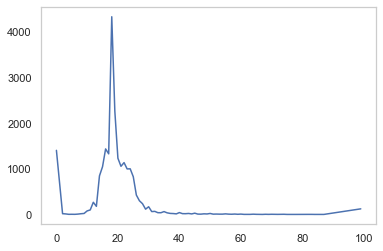

In [111]:
#education

fineetàstudio = df.groupby('d8').count().reset_index()

fineetàstudio2 = fineetàstudio[fineetàstudio['d8'] != 'dk']
fineetàstudio2 = fineetàstudio2[fineetàstudio2['d8'] != 'Refusal']

plt.plot(fineetàstudio2.d8, fineetàstudio2.qb2)



In [112]:
edu = df.groupby('d8').count()
edu

,qb1a,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,country,d25,d63,d7
d8,,,,,,,,,,,,,,,
0,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405
2,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
3,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
99,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123


In [113]:
def transform_education(x):
    if isinstance(x, int): 
        if x == 0:
            return 'Still studying'
        if x <= 15:
            return 'Up to 15 years old'
        if (x > 15) & (x <= 19) :
            return '16-19 years old'
        if (x >= 20): 
            return '20+ years old'
        if x == 99:
            return "Refusal/dk"
        
    else: 
        return 'Refusal/dk'
df['d8'] = df['d8'].apply(lambda x: transform_education(x))

df.head()

,qb1a,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,country,d25,d8,d63,d7
0,Climate change,4.0,No,2,2,2,2,2,Centre-letf,Man,20,BE - Belgium,Large town,Still studying,The middle class of society,Single
1,The increasing global population,5.0,No,2,2,2,2,2,Centre-letf,Man,55,BE - Belgium,Large town,Refusal/dk,The middle class of society,Partner and children
2,Climate change,6.0,No,2,2,2,1,1,Centre-letf,Man,80,BE - Belgium,Large town,Refusal/dk,The lower middle class of society,Single
3,"Poverty, hunger and lack of drinking water",6.0,Yes,2,2,2,2,2,Centre,Man,40,BE - Belgium,Large town,Refusal/dk,The lower middle class of society,Partner and children
4,Proliferation of nuclear weapons,5.0,Yes,3,3,2,3,2,Centre,Man,55,BE - Belgium,Large town,Refusal/dk,The middle class of society,Partner and children


In [71]:
def transform_status(x):
    if x ==  'Other (SPONT.)' or x == 'Refusal (SPONT.)': 
        
        return 'Refusal/Other'
    else: 
        return x
df['d7'] = df.apply(lambda x: transform_status(x['d7']), axis =1)

In [72]:
def transform_live(x):
    if x ==  'Other (SPONTANEOUS)' or x == 'None (SPONTANEOUS)' or x == 'Refusal (SPONTANEOUS)' or x =='dk': 
        
        return 'Refusal/Other'
    else: 
        return x
df['d63'] = df.apply(lambda x: transform_live(x['d63']), axis =1)

In [73]:
c = df.groupby('country').mean().reset_index()

c['country2'] = np.nan
for i in range(len(c)): 
    c['country2'][i] =  c['country'][i][5:]
  

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [75]:
c['country2'][3] = 'Germany'
c['country2'][12] = 'Germany'
c['country2'][16] = 'Cyprus'
c['country2'][8] = 'United Kingdom'
c['country2'][10] = 'Spain'
c['country2'][2] = 'Netherlands'
c['country2'][17] =  'Czech Republic'

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [76]:
c = c[['country', 'country2']]

In [77]:
df = pd.merge(df, c, how='left', left_on='country', right_on='country')
df.head()

,qb1a,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,country,d25,d8,d63,d7,country2
0,Climate change,4.0,No,2,2,2,2,2,Centre-letf,Man,20,BE - Belgium,Large town,Still studying,The middle class of society,Single,Belgium
1,The increasing global population,5.0,No,2,2,2,2,2,Centre-letf,Man,55,BE - Belgium,Large town,Refusal/dk,The middle class of society,Partner and children,Belgium
2,Climate change,6.0,No,2,2,2,1,1,Centre-letf,Man,80,BE - Belgium,Large town,Refusal/dk,The lower middle class of society,Single,Belgium
3,"Poverty, hunger and lack of drinking water",6.0,Yes,2,2,2,2,2,Centre,Man,40,BE - Belgium,Large town,Refusal/dk,The lower middle class of society,Partner and children,Belgium
4,Proliferation of nuclear weapons,5.0,Yes,3,3,2,3,2,Centre,Man,55,BE - Belgium,Large town,Refusal/dk,The middle class of society,Partner and children,Belgium


In [78]:
df = df.drop('country', axis = 1)
df = df.rename(columns={"country2": "country"})


### descriptive statistics

In [79]:
df.groupby('country')['country'].count()

country
Austria            830
Belgium            970
Bulgaria           626
Croatia            904
Cyprus             411
Czech Republic     729
Denmark            839
Estonia            520
Finland            807
France             797
Germany           1200
Greece             854
Hungary            900
Ireland            928
Italy              905
Latvia             687
Lithuania          704
Luxembourg         399
Malta              397
Netherlands        883
Poland             710
Portugal           863
Romania            869
Slovakia           810
Slovenia           874
Spain              820
Sweden             890
United Kingdom     852
Name: country, dtype: int64

In [80]:
df.groupby('qb5')['qb5'].count()

qb5
Yes    14327
No      7651
Name: qb5, dtype: int64

In [81]:
df.groupby('d1')['d1'].count()

d1
Centre              5922
Centre-letf         5902
Centre-right        3470
Left                1853
Not positionable    3228
Right               1603
Name: d1, dtype: int64

In [82]:
df.groupby('d7')['d7'].count()

d7
Partner                 7791
Partner and children    7000
Refusal/Other             92
Single                  5975
Single with children    1120
Name: d7, dtype: int64

In [91]:
df.groupby('d8')['d8'].count()

d8
16-19 years old       9358
20+ years old         8298
Refusal/dk             319
Still studying        1405
Up to 15 years old    2598
Name: d8, dtype: int64

In [84]:
df.groupby('d10')['d10'].count()

d10
Man      10527
Woman    11451
Name: d10, dtype: int64

In [85]:
df.groupby('d25')['d25'].count()

d25
Rural area or village         7068
Small or middle sized town    8510
Large town                    6396
dk                               4
Name: d25, dtype: int64

In [86]:
df.groupby('d63')['d63'].count()

d63
Refusal/Other                          520
The higher class of society            154
The lower middle class of society     3456
The middle class of society          10942
The upper middle class of society     1630
The working class of society          5276
Name: d63, dtype: int64

In [87]:
df.describe()

,qb2,qb4_3,qb4_5,qb7,qb8,qb9,d11
count,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000,21978.000000
mean,7.939257,1.739649,1.907771,1.522113,1.563200,1.502912,50.512149
std,2.025320,0.713760,0.872446,0.656148,0.676395,0.622503,17.876016
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000
25%,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000
50%,8.000000,2.000000,2.000000,1.000000,1.000000,1.000000,51.000000
75%,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,65.000000
max,10.000000,4.000000,4.000000,4.000000,4.000000,4.000000,98.000000


In [88]:
df = df.dropna()

In [89]:
df.to_csv('df-climatechange.csv')